# Práctica integradora: Visualizaciones en Python

Gonzalo Andrés Rojas Bernard

In [1]:
## IMPORTAR LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# estilo
mpl.style.use('bmh')

#dataset escogido: VENTA VIDEOJUEGOS AÑO 2019 (vgsales-12-4-2019.csv)
#columnas:
# Rank - Ranking of overall sales
# Name - Name of the game
# Platform - Platform of the game (i.e. PC, PS4, XOne, etc.)
# Genre - Genre of the game
# ESRB Rating - ESRB Rating of the game
# Publisher - Publisher of the game
# Developer - Developer of the game
# Critic Score - Critic score of the game from 10
# User Score - Users score the game from 10
# Total Shipped - Total shipped copies of the game
# Global_Sales - Total worldwide sales (in millions)
# NA_Sales - Sales in North America (in millions)
# PAL_Sales - Sales in Europe (in millions)
# JP_Sales - Sales in Japan (in millions)
# Other_Sales - Sales in the rest of the world (in millions)
# Year - Year of release of the game

# This is a pure scrape from the vgzcharts website. 
# My guess is that Global Sales is the sum of all Sales while 
# Total Shipped is when there are values missing in the sales columns. (Global Sales = Total Shipped)


#leer dataset
file = pd.read_csv('vgsales-12-4-2019.csv')
#unir columnas iguales, total_shipped son las ventas cuando faltan datos según el creador del dataset.
#rellenar valores nan para el uso de una nueva columna de Global_Sales_Real
file['Global_Sales'] = file['Global_Sales'].fillna(0)
file['Total_Shipped'] = file['Total_Shipped'].fillna(0)
file['Global_Sales_Real'] = file['Global_Sales']+file['Total_Shipped']
file

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url,Global_Sales_Real
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg,82.86
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg,40.24
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg,37.14
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,36.60
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg,33.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg,0.00
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg,0.00
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg,0.00
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg,0.00


Text(0, 0.5, 'Frecuencia absoluta')

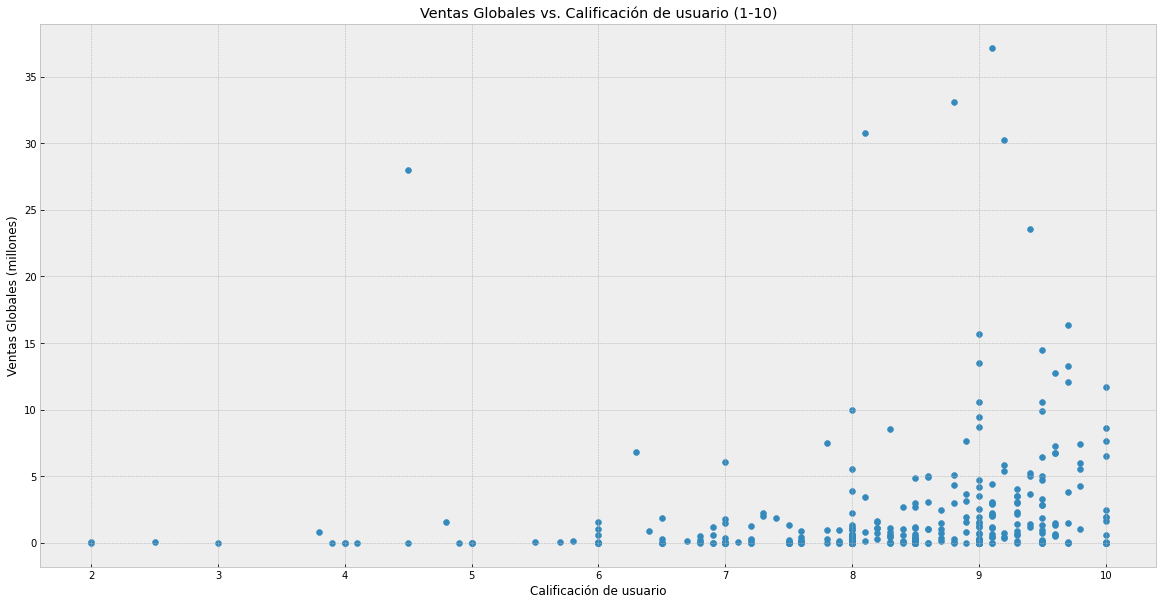

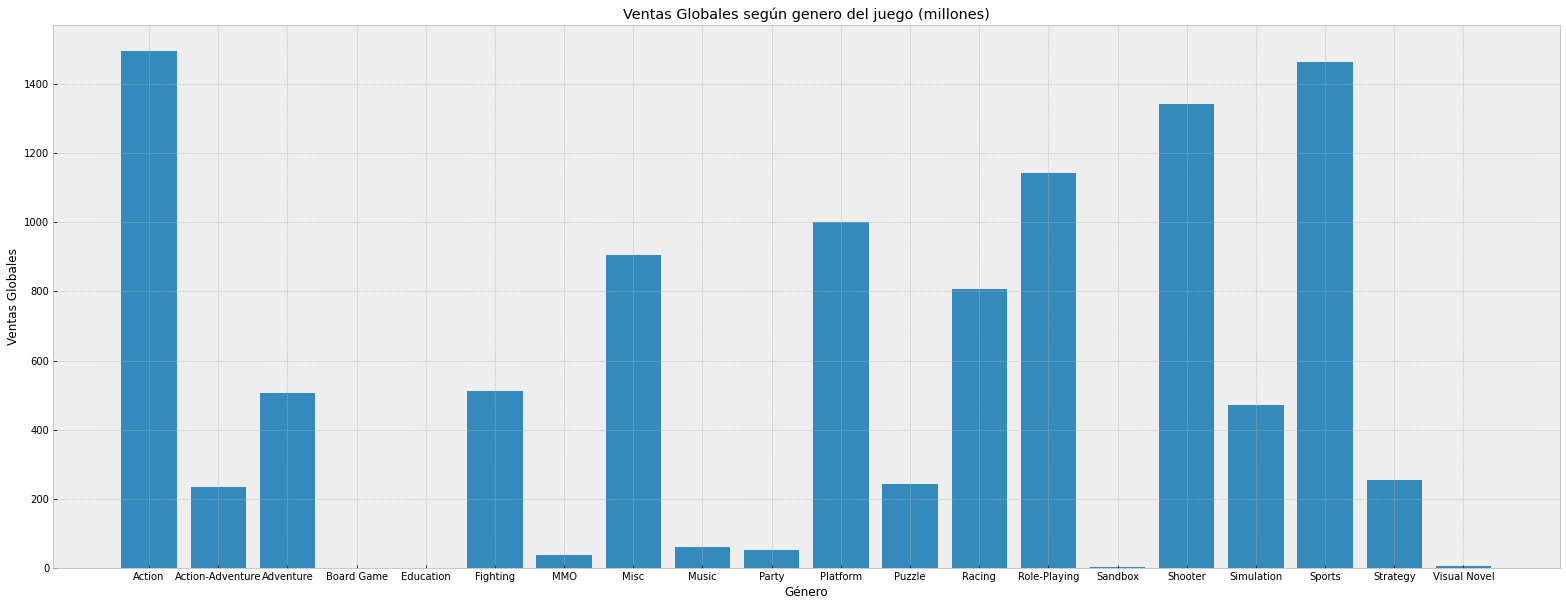

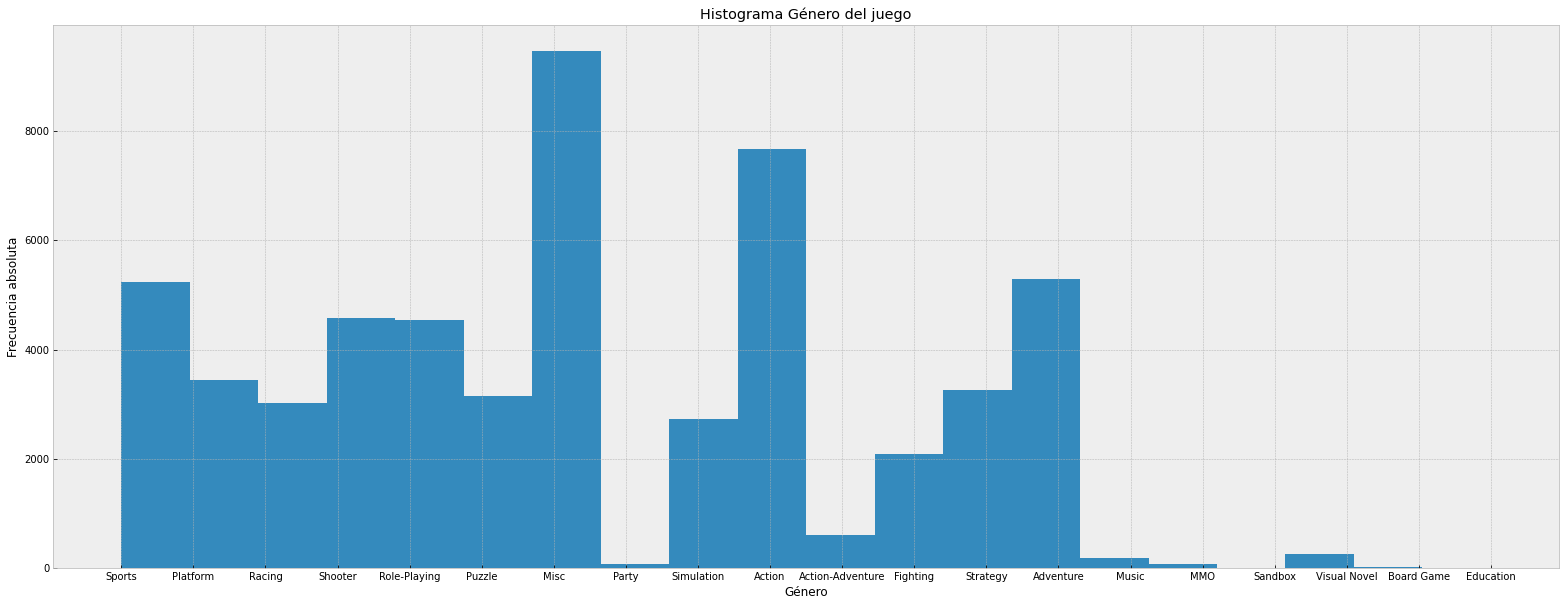

In [13]:
# GRÁFICOS MATPLOTLIB

# ver relación entre ventas globales y la calificación del usuario

fig, ax = plt.subplots(figsize = (20,10))
# (x,y)
ax.scatter(file['User_Score'],file['Global_Sales_Real'])
ax.set_title('Ventas Globales vs. Calificación de usuario (1-10)')
ax.set_ylabel('Ventas Globales (millones)')
ax.set_xlabel('Calificación de usuario')
#fig.show()


# ver relación entre ventas globales según el género del juego

#agrupar género y sumar ventas globales
file_genre = file.groupby(['Genre'])['Global_Sales_Real'].sum()
file_genre = file_genre.reset_index()

fig, ax = plt.subplots(figsize = (27,10))
ax.bar(file_genre['Genre'], file_genre['Global_Sales_Real'])
ax.set_title('Ventas Globales según genero del juego (millones)')
ax.set_xlabel('Género')
ax.set_ylabel('Ventas Globales')
#fig.show()


# ver relación la frecuencia de juegos según el género

#fig, ax = plt.subplots(figsize = (25,15))
fig, ax = plt.subplots(figsize = (27,10))
ax.hist(file['Genre'].values.flatten(),bins=len(file['Genre'].value_counts()))
ax.set_title('Histograma Género del juego')
ax.set_xlabel('Género')
ax.set_ylabel('Frecuencia absoluta')
#fig.show()


SCATTER PLOT (ventas globales vs clasificación usuario): se observa que no importa mucho la calificación del juego
en relación a las ventas globales, debido a que se concentran los puntos
dentro de la calificacón de usuario desde 7 a 10, lo cual es una clasificación
alta, en donde se tienen de 0 a 4 millones de ventas, con algunas excepciones
que concuerdan con clasificación alta y alto nivel de ventas y, análogamente,
con clasificación baja y bajo nivel de ventas.

BAR PLOT (ventas globales según género de juego): se observa que los juegos
con mayor número de ventas son los juegos de , seguido por acción (Action)
los juego de deportes (Sport), y los juegos con el menor número de ventas son
los juegos de mesa (Board Game), de educación (Education) y de novelas visuales
(Visual Novel).

HISTOGRAMA (frecuencia de juegos en el dataset según genero): Para corroborar
el barplot, se observa que la frecuencia de algunos juegos son bajas, por
ejemplo los de juegos de mesa se observa que una muy pequeña cantidad están
ingresados al dataset, por lo que se ve reflejado en la menor cantidad de ventas
al igual con educación. Se puede interpretar que los juegos de deporte (Sport)
si son bien vendidos debido a que no es el género de juego más ingresado al
dataset.

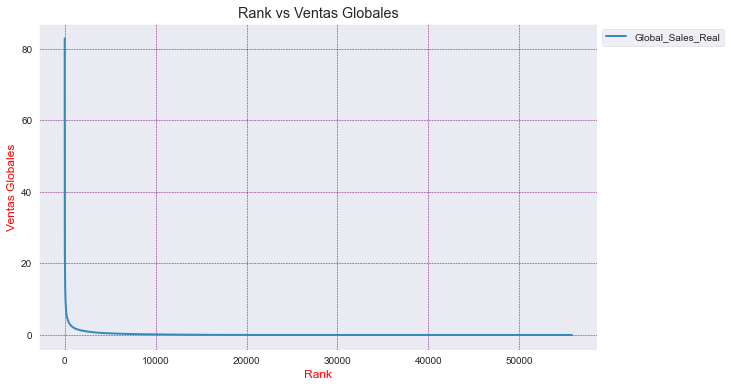

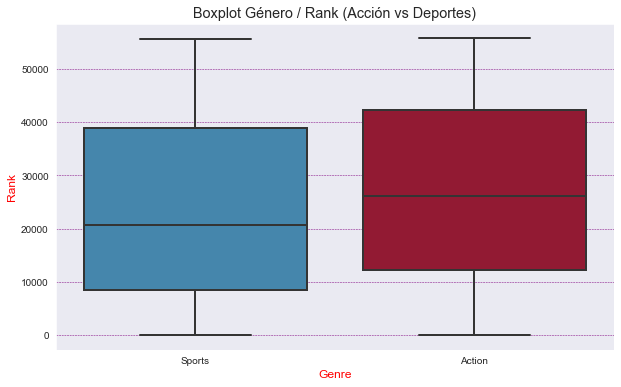

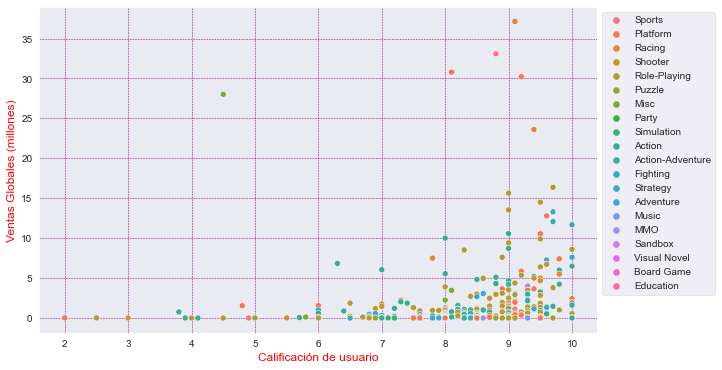

In [14]:
# GRÁFICOS SEABORN

# settear estilo seaborn
sns.set_style(style="darkgrid", rc={"grid.color": ".6"})
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlelocation": "left"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "red"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})

file_line = file[['Rank','Global_Sales_Real']]
file_line = file_line.set_index('Rank')


#Ventas Globales vs Rank

plt.figure(figsize=(10,6))
sns.lineplot(data=file_line)
plt.ylabel('Ventas Globales')
plt.xlabel('Rank')
plt.title('Rank vs Ventas Globales')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# considerando que son los más vendidos e ingresados al dataset, separemos en género de Acción y Deportes.

file_games = file.loc[(file['Genre'] == 'Sports') | (file['Genre'] == 'Action')]

# boxplot para género = deportes y para género = acción

plt.figure(figsize=(10,6))
plt.title('Boxplot Género / Rank (Acción vs Deportes)')
ax = sns.boxplot(x="Genre", y="Rank", data=file_games)
plt.show()


# scatter plot con coLores Ventas globales vs clasificación de usuario

plt.figure(figsize=(10,6))
sns.scatterplot(data=file, x="User_Score", y="Global_Sales_Real", hue="Genre")
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylabel('Ventas Globales (millones)')
plt.xlabel('Calificación de usuario')
plt.show()


LINEPLOT (Ventas Globales vs Rank): Se observa que a medida que baja el rank del juego,
va bajando su número de ventas y, curiosamente, se parece mucho a una gráfica de |1/x| para
x>0.

BOXPLOT (Género/Rank): se ve que la mediana o segundo cuartil se encuentra para los juegos
de deportes en Rank 20.000 aprox., con el 25% de los datos bajo 10.000 aprox. (primer cuartil) y el 
75% de los datos bajo 40.000 aprox. (tercer cuartil). Para los juegos de acción, la mediana se 
encuentra aprox en un Rank 25.000, con el 25% de los datos bajo 12.000 aprox. y el 75% de los datos
bajo 42.000 aprox.

In [20]:
# datos boxplot:
# deportes:
Q1_S = np.percentile(file_games.loc[file_games['Genre'] == 'Sports']['Rank'], 25)
Q2_S = np.percentile(file_games.loc[file_games['Genre'] == 'Sports']['Rank'], 50)
Q3_S = np.percentile(file_games.loc[file_games['Genre'] == 'Sports']['Rank'], 75)

In [21]:
Q1_S #cuartil 1

8525.25

In [17]:
Q2_S #cuartil 2

20633.0

In [18]:
Q3_S #cuartil 3

39020.25

In [23]:
# Acción:
Q1_A = np.percentile(file_games.loc[file_games['Genre'] == 'Action']['Rank'], 25)
Q2_A = np.percentile(file_games.loc[file_games['Genre'] == 'Action']['Rank'], 50)
Q3_A = np.percentile(file_games.loc[file_games['Genre'] == 'Action']['Rank'], 75)

In [26]:
Q1_A #cuartil 1

12152.0

In [27]:
Q2_A #cuartil 2

26231.0

In [28]:
Q3_A #cuartil 3

42398.0

SCATTERPLOT (Ventas globales vs clasificación de usuario, con colores basado en el género del juego):
misma conclusión que ocupando matplotlib sin colores, pero se observa que con colores basado en el
género del juego, los juegos de deportes (Sports) y carreras (Racing), se encuentran con los números
más altos en ventas.